# Importando as bibliotecas

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Importando e customizando o *seaborn*

In [ ]:
import seaborn as sns
sns.set_palette('Accent')
sns.set_style('darkgrid')

# Importando e visualizando os dados

In [ ]:
fonte = 'https://github.com/alura-cursos/imersao-dados-2-2020/blob/master/MICRODADOS_ENEM_2019_SAMPLE_43278.csv?raw=true'

In [ ]:
dados = pd.read_csv(fonte)
dados.head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,...,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,190001004661,2019,1506138,Redenção,15,PA,17,M,1,3,1,1506138.0,Redenção,15.0,PA,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,ACAEAAACABEBABAADCEEEDE*CBDCCCADADCCCBEBBBBDB,99999CCCABBCAADDBCEBCCADBEEBDECBAABDEACACAEABB...,DEEDCAECDDEEECBCBECABEBAECBBCDAECAEBBBBBDCCDB,1,DEADBAAAEBEECEBCBCBCBDADAEABCEDDDDADCBEECACBC,ACACEEBCCBABADBBBACDBBACCCCADCEBADCBEEDBBEADB,EBBADCABDABACBCEBDEEAAADDBECDECDDBADBCDAAECBCC...,AADDDBEEEBEDDBEBACABCDBABECECACAECDCBDCCEDCDA,1.0,60.0,100.0,80.0,80.0,100.0,420.0,B,B,A,A,4,B,A,C,B,A,C,B,A,A,A,A,A,A,A,B,A,C,A,B,B
1,190001004674,2019,1504208,Marabá,15,PA,23,M,1,3,1,1504208.0,Marabá,15.0,PA,1,3,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,ABBCEADCEBAAACACEDCDCDACCCACDCBCABCAACBDBDEDE,99999ABCEBCEDDECEEEBBCCEECCABDABEEBCDEAEBBEAEA...,NaN,1,NaN,CBABADBBCEEEBCBADCBEEDBBEADBBACDBBACCCCADACAC,BBEDABDACACBABAECBBCCADCEBDBBCDDEEAAADDBECDECA...,NaN,1.0,80.0,100.0,80.0,80.0,60.0,400.0,C,C,A,A,4,B,A,B,C,A,A,B,B,B,A,A,A,A,B,A,A,B,A,A,B
2,190001004722,2019,1501402,Belém,15,PA,35,F,2,1,1,1501402.0,Belém,15.0,PA,1,12,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,CDCAACCAAADEACBBEBAAEECDABDEBAEAABEDCABABAABC,99999ECBCECEBBABECCCECECCEECCDECEEEDADDDDECEDD...,DDBEADEBBCADCEEACABECBCEBADECADCEDAACBDABABCE,1,AAECACDEADCBCDDDBCBDADAEABCEBABEEBCBEECEBDADC,CBABADBBCEEEBCBADCBEEDBBEADBBACDBBACCCCADACAC,BBEDABDACACBABAECBBCCADCEBDBBCDDEEAAADDBECDECA...,EEEADBEBACABCDBABECECACDCBDCCEDCDABEDECDDDBAA,1.0,100.0,120.0,120.0,100.0,120.0,560.0,C,A,B,B,5,C,A,B,C,A,A,B,A,B,A,A,A,A,B,A,B,B,A,A,B
3,190001004735,2019,1507300,São Félix do Xingu,15,PA,23,F,1,3,1,1505437.0,Ourilândia do Norte,15.0,PA,1,7,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,EECCCEDBADBEAAAAEBAECEAAAAEEEBACCAC*CEAEDAECE,99999BABCDABBCBDDAAECADBDDADDCBCEEDCAEBCEAEABD...,CBDEBBCBDEBCABCDBDEDADCCBEDBCAECEBEBDEBAEECBC,1,BEEAAEBEEBADEADDADAEABCEDDDBCBCBCCACBCDADCCEB,EEBCEEDBADBBCBABCCADCEBACDBBACCACACBEADBBADCB,ADBBEDCABAABBCBCDAAECDDDBAAAECADECDCEBDEEAECBD...,BEDEEEAADBEBACABCDBABECECACADCBDCCEDCDABECDDD,1.0,100.0,120.0,120.0,120.0,40.0,500.0,E,C,A,A,1,B,A,B,C,A,A,B,A,A,A,A,A,A,B,A,A,B,A,A,B
4,190001004776,2019,1500800,Ananindeua,15,PA,16,F,1,3,1,1500800.0,Ananindeua,15.0,PA,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,CCBCBEACABACABBBBACCBCEBDCBABCADADCBCADBAADEA,EBCAB99999BBCECBCACBEACBDAABDBCBBDACEBBACDCAEC...,AECCBBCBBCBDEDECACBAABEDABBEDDADCEADDBEBDBBEB,0,DEADBAAAEBEECEBCBCBCBDADAEABCEDDDDADCBEECACBC,ACACEEBCCBABADBBBACDBBACCCCADCEBADCBEEDBBEADB,EBBADCABDABACBCEBDEEAAADDBECDECDDBADBCDAAECBCC...,AADDDBEEEBEDDBEBACABCDBABECECACAECDCBDCCEDCDA,1.0,160.0,140.0,160.0,160.0,160.0,780.0,E,E,B,D,3,E,A,B,C,B,A,B,A,A,A,A,A,A,B,A,A,D,A,A,B


# Relação de inscritos por estado


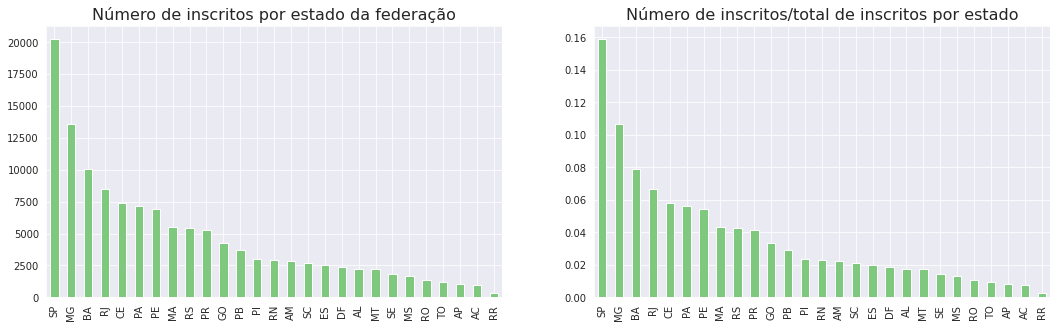

In [ ]:
ax = plt.figure(figsize = (18,5))

ax = plt.subplot(1,2,1)
ax = dados['SG_UF_RESIDENCIA'].value_counts().plot(kind = 'bar')
ax.set_title('Número de inscritos por estado da federação', fontsize = 16)

ax = plt.subplot(1,2,2)
dados['SG_UF_RESIDENCIA'].value_counts(normalize = True).plot(kind = 'bar')
ax.set_title('Número de inscritos/total de inscritos por estado', fontsize = 16)

ax =ax

# Análise da idade dos participantes

In [ ]:
print('Idade mínima dos candidatos: ', dados['NU_IDADE'].min())

Idade mínima dos candidatos:  13


In [ ]:
list(dados.query('NU_IDADE == 13')['SG_UF_RESIDENCIA'])

['SP', 'MT', 'AP', 'BA']

Conclusão: 4 participantes com 13 anos são dos estados de São Paulo, Mato Grosso, Amapá e Bahia

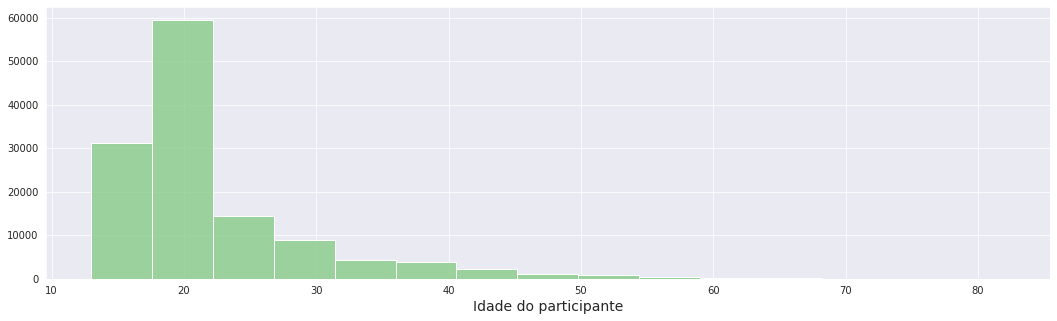

In [ ]:
ax = plt.figure(figsize = (18, 5))

ax = sns.histplot(dados['NU_IDADE'], kde = False, bins = 15)
ax.set_xlabel('Idade do participante', fontsize = 14)
ax.set_ylabel('', fontsize = 14)

ax = ax

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


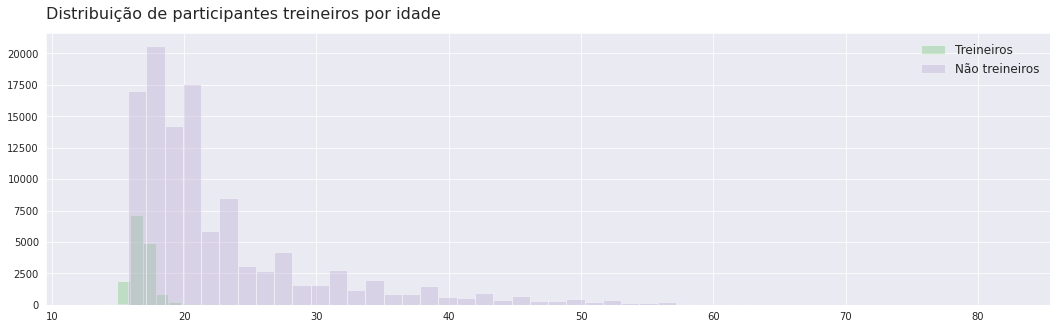

In [ ]:
ax = plt.figure(figsize = (18, 5))
ax = sns.distplot(dados.query('IN_TREINEIRO == 1')['NU_IDADE'], kde= False, label = 'Treineiros')
ax = sns.distplot(dados.query('IN_TREINEIRO != 1')['NU_IDADE'], kde = False, label = 'Não treineiros')

ax.set_xlabel('')
ax.set_title('Distribuição de participantes treineiros por idade', fontsize = 16, loc ='left', y= 1.03)
ax.legend(loc = 'best', fontsize = 12, frameon = False)
ax=ax

# Análise das notas das provas

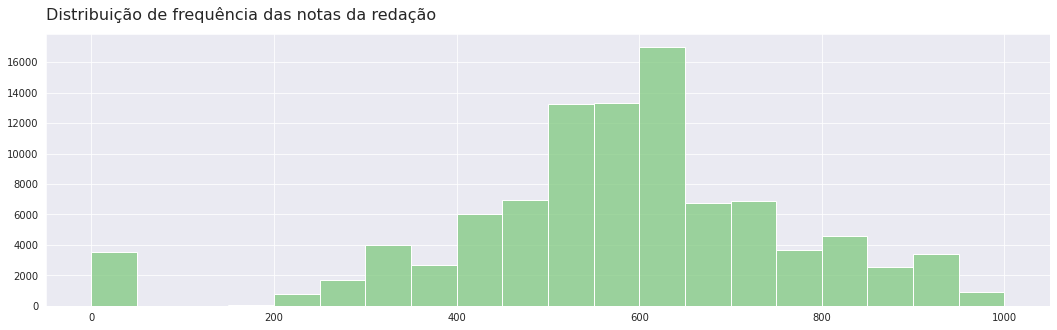

In [ ]:
ax = plt.figure(figsize = (18, 5))
ax = sns.histplot(dados['NU_NOTA_REDACAO'], kde = False, bins = 20)

ax.set(xlabel = '', ylabel = '')
ax.set_title('Distribuição de frequência das notas da redação', fontsize = 16, loc ='left', y = 1.03)

ax = ax

In [ ]:
provas = ['NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_MT','NU_NOTA_LC','NU_NOTA_REDACAO']

## Notas de Linguagens e Códigos devido à língua estrangeira escolhida

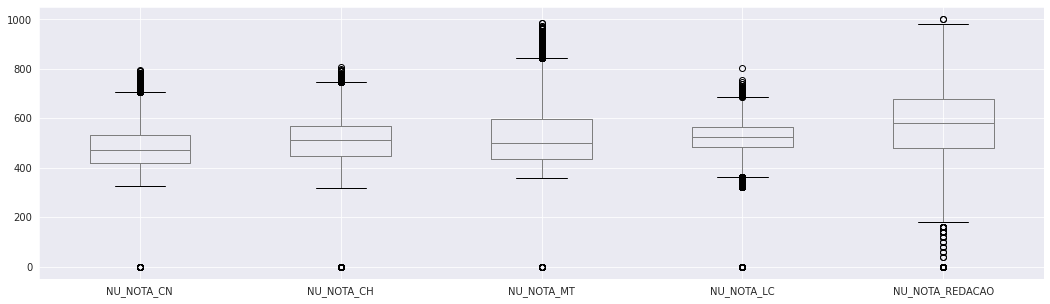

In [ ]:
ax = plt.figure(figsize = (18, 5))

ax = dados[provas].boxplot()

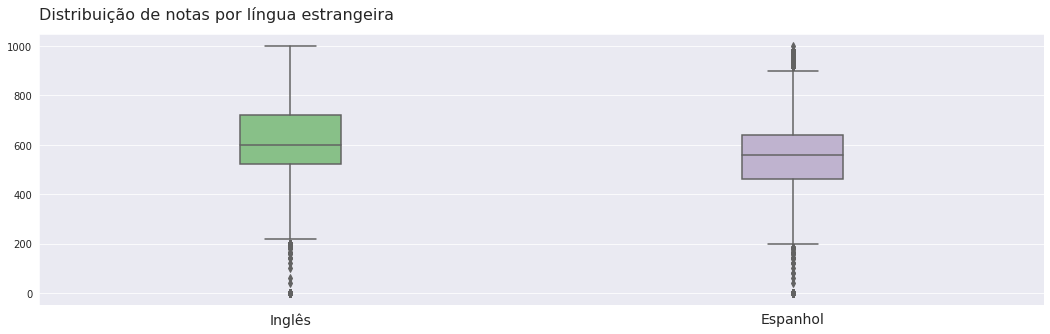

In [ ]:
ax = plt.figure(figsize = (18, 5))
ax = sns.boxplot(data = dados, x = 'TP_LINGUA', y = 'NU_NOTA_REDACAO', width = 0.2)

ax.set_xticklabels(['Inglês', 'Espanhol'], fontsize = 14)
ax.set(xlabel = '', ylabel = '')
ax.set_title('Distribuição de notas por língua estrangeira', fontsize = 16, loc = 'left', y = 1.03)
ax = ax

**Conclusão**: Aparentemente, não há variação entre as notas devido à língua estrangeira.

## Distribuição das notas de acordo com a renda familiar

In [ ]:
renda_ordenada = dados['Q006'].unique()
renda_ordenada.sort()

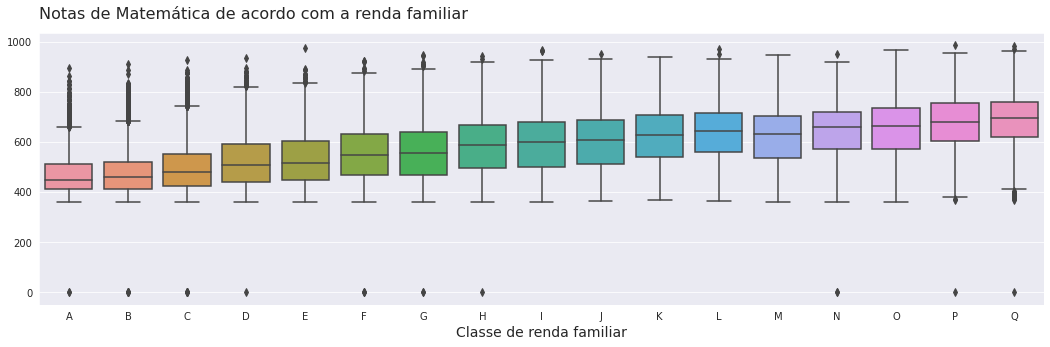

In [ ]:
ax = plt.figure(figsize = (18, 5))
ax = sns.boxplot(x = 'Q006', y = 'NU_NOTA_MT', data = dados, order = renda_ordenada)

ax.set_title('Notas de Matemática de acordo com a renda familiar', fontsize = 16, loc = 'left', y = 1.03)
ax.set_ylabel('')
ax.set_xlabel('Classe de renda familiar', fontsize = 14)
ax = ax

**Conclusão**: As notas da prova de Matemática aparentemente crescem com o aumento da renda familiar. Por meio da análise dos gráficos de caixa, os *outliers* indicam que notas maiores não são uma realidade entre as classes mais baixas. Conforme aumenta a renda, as notas tendem a ser mais estáveis.

In [ ]:
dados['NU_NOTA_TOTAL'] = dados[provas].sum(axis = 1) #Nota total das provas

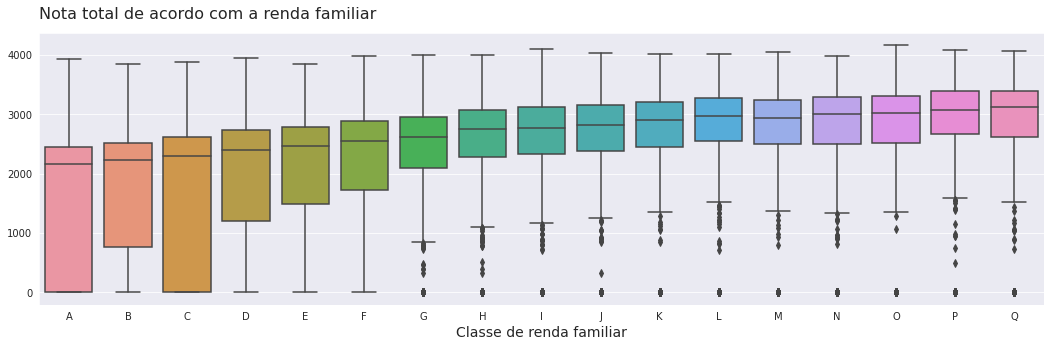

In [ ]:
ax = plt.figure(figsize = (18, 5))
ax = sns.boxplot(x = 'Q006', y = 'NU_NOTA_TOTAL', data = dados, order = renda_ordenada)

ax.set_title('Nota total de acordo com a renda familiar', fontsize = 16, loc = 'left', y = 1.03)
ax.set_xlabel('Classe de renda familiar', fontsize = 14)
ax.set_ylabel('')
ax = ax

**Conclusão**: há um grande número de alunos com nota total nula nas classes A e C, de modo que estes não serão considerados na análise.

In [ ]:
dados_nao_nulos = dados.query('NU_NOTA_TOTAL != 0')
dados_nao_nulos.head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,...,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,NU_NOTA_TOTAL
0,190001004661,2019,1506138,Redenção,15,PA,17,M,1,3,1,1506138.0,Redenção,15.0,PA,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,99999CCCABBCAADDBCEBCCADBEEBDECBAABDEACACAEABB...,DEEDCAECDDEEECBCBECABEBAECBBCDAECAEBBBBBDCCDB,1,DEADBAAAEBEECEBCBCBCBDADAEABCEDDDDADCBEECACBC,ACACEEBCCBABADBBBACDBBACCCCADCEBADCBEEDBBEADB,EBBADCABDABACBCEBDEEAAADDBECDECDDBADBCDAAECBCC...,AADDDBEEEBEDDBEBACABCDBABECECACAECDCBDCCEDCDA,1.0,60.0,100.0,80.0,80.0,100.0,420.0,B,B,A,A,4,B,A,C,B,A,C,B,A,A,A,A,A,A,A,B,A,C,A,B,B,2288.9
1,190001004674,2019,1504208,Marabá,15,PA,23,M,1,3,1,1504208.0,Marabá,15.0,PA,1,3,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,99999ABCEBCEDDECEEEBBCCEECCABDABEEBCDEAEBBEAEA...,NaN,1,NaN,CBABADBBCEEEBCBADCBEEDBBEADBBACDBBACCCCADACAC,BBEDABDACACBABAECBBCCADCEBDBBCDDEEAAADDBECDECA...,NaN,1.0,80.0,100.0,80.0,80.0,60.0,400.0,C,C,A,A,4,B,A,B,C,A,A,B,B,B,A,A,A,A,B,A,A,B,A,A,B,1184.6
2,190001004722,2019,1501402,Belém,15,PA,35,F,2,1,1,1501402.0,Belém,15.0,PA,1,12,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,99999ECBCECEBBABECCCECECCEECCDECEEEDADDDDECEDD...,DDBEADEBBCADCEEACABECBCEBADECADCEDAACBDABABCE,1,AAECACDEADCBCDDDBCBDADAEABCEBABEEBCBEECEBDADC,CBABADBBCEEEBCBADCBEEDBBEADBBACDBBACCCCADACAC,BBEDABDACACBABAECBBCCADCEBDBBCDDEEAAADDBECDECA...,EEEADBEBACABCDBABECECACDCBDCCEDCDABEDECDDDBAA,1.0,100.0,120.0,120.0,100.0,120.0,560.0,C,A,B,B,5,C,A,B,C,A,A,B,A,B,A,A,A,A,B,A,B,B,A,A,B,2350.5
3,190001004735,2019,1507300,São Félix do Xingu,15,PA,23,F,1,3,1,1505437.0,Ourilândia do Norte,15.0,PA,1,7,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,99999BABCDABBCBDDAAECADBDDADDCBCEEDCAEBCEAEABD...,CBDEBBCBDEBCABCDBDEDADCCBEDBCAECEBEBDEBAEECBC,1,BEEAAEBEEBADEADDADAEABCEDDDBCBCBCCACBCDADCCEB,EEBCEEDBADBBCBABCCADCEBACDBBACCACACBEADBBADCB,ADBBEDCABAABBCBCDAAECDDDBAAAECADECDCEBDEEAECBD...,BEDEEEAADBEBACABCDBABECECACADCBDCCEDCDABECDDD,1.0,100.0,120.0,120.0,120.0,40.0,500.0,E,C,A,A,1,B,A,B,C,A,A,B,A,A,A,A,A,A,B,A,A,B,A,A,B,2555.7
4,190001004776,2019,1500800,Ananindeua,15,PA,16,F,1,3,1,1500800.0,Ananindeua,15.0,PA,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,EBCAB99999BBCECBCACBEACBDAABDBCBBDACEBBACDCAEC...,AECCBBCBBCBDEDECACBAABEDABBEDDADCEADDBEBDBBEB,0,DEADBAAAEBEECEBCBCBCBDADAEABCEDDDDADCBEECACBC,ACACEEBCCBABADBBBACDBBACCCCADCEBADCBEEDBBEADB,EBBADCABDABACBCEBDEEAAADDBECDECDDBADBCDAAECBCC...,AADDDBEEEBEDDBEBACABCDBABECECACAECDCBDCCEDCDA,1.0,160.0,140.0,160.0,160.0,160.0,780.0,E,E,B,D,3,E,A,B,C,B,A,B,A,A,A,A,A,A,B,A,A,D,A,A,B,2803.5


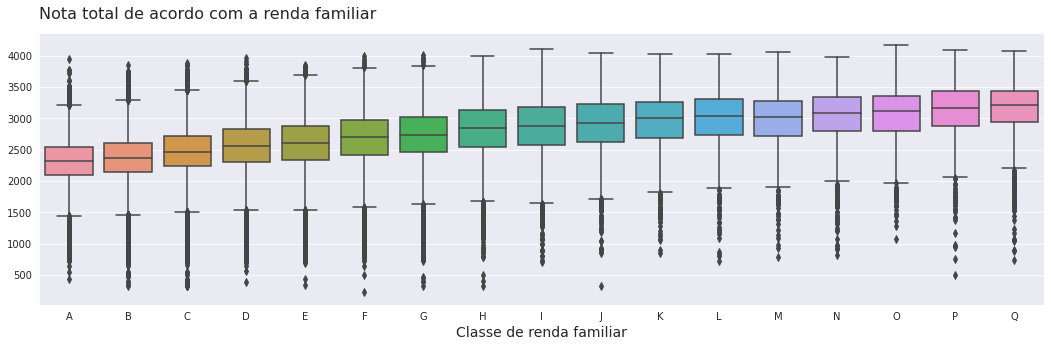

In [ ]:
ax = plt.figure(figsize = (18, 5))
ax = sns.boxplot(x = 'Q006', y = 'NU_NOTA_TOTAL', data = dados_nao_nulos, order = renda_ordenada)

ax.set_title('Nota total de acordo com a renda familiar', fontsize = 16, loc = 'left', y = 1.03)
ax.set_xlabel('Classe de renda familiar', fontsize = 14)
ax.set_ylabel('')
ax = ax

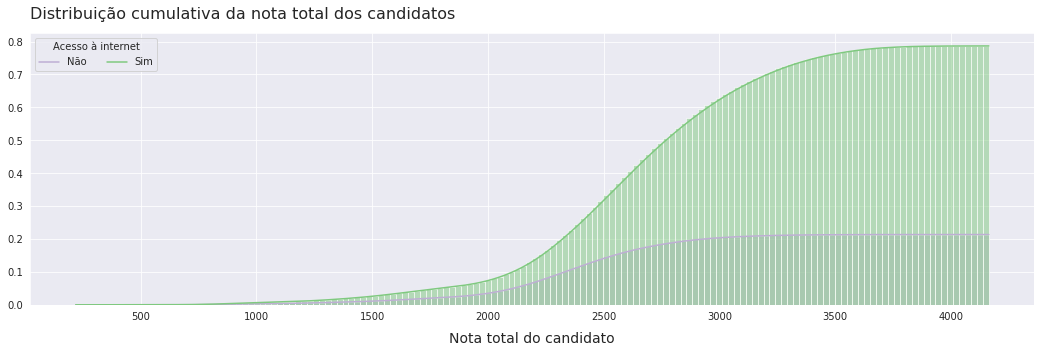

In [ ]:
ax = plt.figure(figsize = (18,5))
ax = sns.histplot(data = dados_nao_nulos, x = 'NU_NOTA_TOTAL', hue = 'Q025', kde = True, stat = 'probability', cumulative = True)

ax.set_xlabel('Nota total do candidato', fontsize = 14, labelpad = 10)
ax.set_ylabel('')
ax.set_title('Distribuição cumulativa da nota total dos candidatos', fontsize = 16, loc = 'left', y = 1.03)

ax.legend(['Não', 'Sim'], title = 'Acesso à internet', ncol = 2, loc = 'best')

ax = ax

**Conclusão**: candidatos sem acesso à *internet* tendem a obter uma nota 500 pontos menor, limitada a aproximadamente 3000 pontos.

# Comparações entre notas (correlações)

In [ ]:
correlacao = dados_nao_nulos[provas].corr()

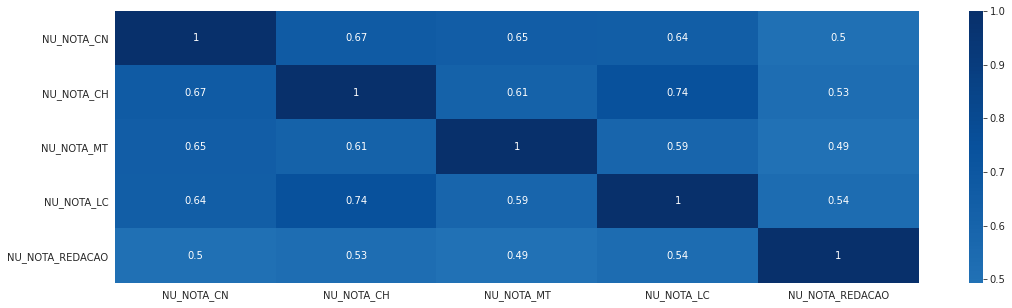

In [ ]:
ax = plt.figure(figsize = (18,5))
ax = sns.heatmap(correlacao, cmap = 'Blues', center = 0, annot = True)

ax = ax

**Conclusão**: parece haver uma correlação entre as notas de Ciências Humanas e de Linguagens e Códigos.

# *Machine Learning*

## Modelo de regresão linear

In [ ]:
dados_nao_nulos = dados_nao_nulos[provas].dropna() #Remoção de NaN

In [ ]:
x = dados_nao_nulos[['NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_CN', 'NU_NOTA_REDACAO']] #Variáveis independentes
y = dados_nao_nulos['NU_NOTA_MT'] #Variável dependente

In [ ]:
from sklearn.model_selection import train_test_split

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size = 0.25, random_state = 4321)

In [ ]:
from sklearn.svm import LinearSVR

modelo = LinearSVR(random_state = 4321)
modelo_aj = modelo.fit(x_treino, y_treino)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [ ]:
predicoes_matematica = modelo_aj.predict(x_teste)

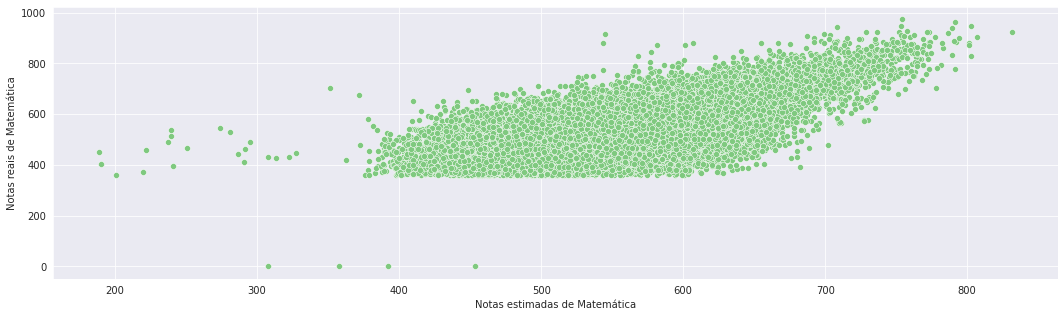

In [ ]:
ax = plt.figure(figsize = (18,5))
ax = sns.scatterplot(x = predicoes_matematica, y = y_teste)

ax.set(xlabel = 'Notas estimadas de Matemática', ylabel = 'Notas reais de Matemática')
ax = ax

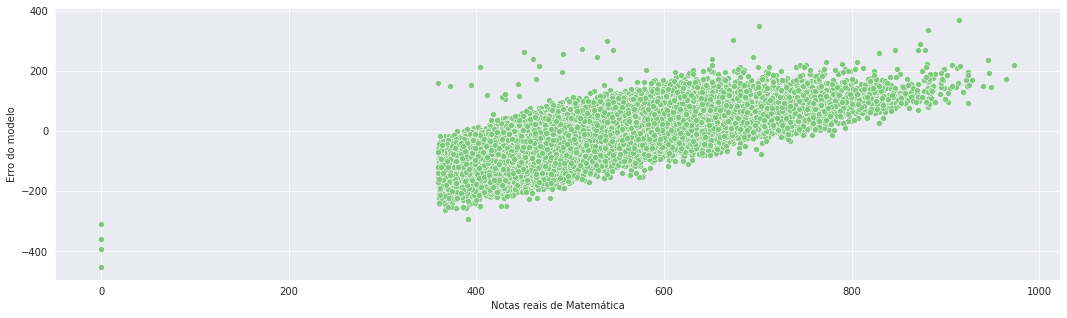

In [ ]:
ax = plt.figure(figsize = (18,5))
ax = sns.scatterplot(x = y_teste, y = (y_teste - predicoes_matematica))

ax.set(xlabel = 'Notas reais de Matemática', ylabel = 'Erro do modelo')
ax = ax

## Análise do modelo de regressão linear

In [ ]:
resultados = {'Real': y_teste, 'Previsao': predicoes_matematica}
resultados = pd.DataFrame(resultados)

In [ ]:
resultados['ERRO'] = resultados['Real'] - resultados['Previsao'] #Erro
resultados['ERRO AO QUADRADO'] = (resultados['ERRO'])**2 #Erro quadrático

resultados.head()

,Real,Previsao,ERRO,ERRO AO QUADRADO
114991,459.7,564.486105,-104.786105,10980.127878
104685,617.2,628.305027,-11.105027,123.321625
91028,520.0,509.980986,10.019014,100.380650
115802,703.8,593.681144,110.118856,12126.162420
93303,627.1,579.784588,47.315412,2238.748252


In [ ]:
print('Erro quadrático médio:', resultados['ERRO AO QUADRADO'].mean()) #Erro quadrático médio
print('Erro:', (resultados['ERRO AO QUADRADO'].mean())**(1/2)) #Erro

Erro quadrático médio: 6604.415306219529
Erro: 81.26755383435341


**Conclusão**: o modelo está prevendo uma nota de 80 pontos a mais do que a nota real.

### Comparando com um *Dummy Regressor*

In [ ]:
from sklearn.dummy import DummyRegressor

modelo_dummy = DummyRegressor()
modelo_dummy.fit(x_treino, y_treino)
dummy_predicoes = modelo_dummy.predict(x_teste)

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
print('Erro quadrático médio do regressor Dummy:', mean_squared_error(y_teste, dummy_predicoes))
print('Erro quadrático médio do modelo de regressão:', mean_squared_error(y_teste, predicoes_matematica))

Erro quadrático médio do regressor Dummy: 12063.645588509502
Erro quadrático médio do modelo de regressão: 6604.41530621957


## Trabalhando com árvores de decisão

In [ ]:
from sklearn.tree import DecisionTreeRegressor

modelo_arvore = DecisionTreeRegressor(max_depth = 3)
modelo_arvore.fit(x_treino, y_treino)
predicoes_matematica_arvore = modelo_arvore.predict(x_teste)

print('Erro quadrático médio do modelo de regressão:', mean_squared_error(y_teste, predicoes_matematica_arvore))

Erro quadrático médio do modelo de regressão: 6027.166905272976


In [ ]:
from sklearn.model_selection import cross_validate

modelo_arvore = DecisionTreeRegressor(max_depth = 2)
resultados = cross_validate(modelo_arvore, x, y, scoring = 'neg_mean_squared_error')

media = (resultados['test_score'] * (-1)).mean()
desvio_padrao = (resultados['test_score'] * (-1)).std()
limite_inferior = media - 2 * desvio_padrao
limite_superior = media + 2 * desvio_padrao

print(f'Intervalo de confiança: {limite_inferior} a {limite_superior}')

Intervalo de confiança: 6162.37705150318 a 6950.632947334644


### Inserindo aleatoriedade no modelo

In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
import numpy as np

seed = 1282
np.random.seed(seed)

partes = KFold(n_splits = 10, shuffle = True)

modelo_arvore = DecisionTreeRegressor(max_depth = 2)
resultados = cross_validate(modelo_arvore, x, y, cv = partes, scoring = 'neg_mean_squared_error')

media = (resultados['test_score'] * (-1)).mean()
desvio_padrao = (resultados['test_score'] * (-1)).std()
limite_inferior = media - 2 * desvio_padrao
limite_superior = media + 2 * desvio_padrao

print(f'Intervalo de confiança: {limite_inferior} a {limite_superior}')

Intervalo de confiança: 6269.836702418954 a 6833.326718679922
